# Université Moulay Ismail
## FS Meknès Département d'Informatique
### Parcours d'excellence : SDIA – S6
#### OTHMANE FERRAH

# TP 3: Classification

## Partie 1: Développement d'un programme de classification binaire

Nous allons commencer par générer des données synthétiques pour un problème de classification binaire, puis entraîner un classifieur `SGDClassifier` et visualiser sa frontière de décision.

### 1.1 Importation des modules nécessaires

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split # Utile pour une évaluation plus robuste
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Métriques d'évaluation

### 1.2 Génération et visualisation des données aléatoires

La fonction `make_classification` de Scikit-learn est utilisée pour créer un jeu de données adapté à des tâches de classification. Nous allons générer 100 exemples avec 2 classes et 2 features (caractéristiques).

Forme des features (X): (100, 2)
Forme des labels (y): (100,)
Labels uniques : [0 1]


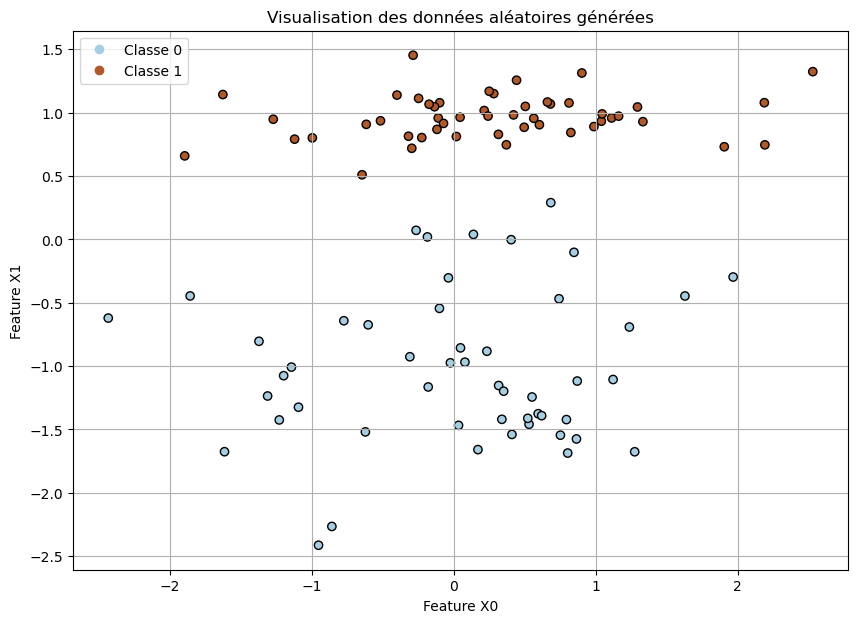

In [58]:
# Paramètres pour la génération de données
n_samples = 100
n_features = 2
n_classes = 2
n_informative_features = 1 # Nombre de features informatives (utiles pour la classification)
n_redundant_features = 0   # Nombre de features redondantes (combinaisons linéaires des features informatives)
n_clusters_per_class = 1 # Nombre de clusters par classe
random_state_seed = 1      # Pour la reproductibilité des résultats

# Génération des données
X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=n_informative_features,
                           n_redundant=n_redundant_features,
                           n_clusters_per_class=n_clusters_per_class,
                           n_classes=n_classes,
                           random_state=random_state_seed)

# Affichage de la forme des données générées
print(f"Forme des features (X): {X.shape}")
print(f"Forme des labels (y): {y.shape}")
print(f"Labels uniques : {np.unique(y)}")

# Visualisation des données
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X[:,0], X[:, 1], marker='o', c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature X0')
plt.ylabel('Feature X1')
plt.title('Visualisation des données aléatoires générées')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Classe {i}' for i in np.unique(y)])
plt.grid(True)
plt.show()

### 1.3 Création et entraînement du modèle `SGDClassifier`

Nous allons utiliser `SGDClassifier` (Stochastic Gradient Descent Classifier). Ce classifieur est efficace pour les grands jeux de données. Nous utiliserons la fonction de coût 'log_loss', ce qui le rend équivalent à une Régression Logistique entraînée par SGD.

Pour une meilleure évaluation, nous allons d'abord diviser nos données en un ensemble d'entraînement et un ensemble de test.

In [59]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_seed)

print(f"Taille de l'ensemble d'entraînement (X_train): {X_train.shape}")
print(f"Taille de l'ensemble de test (X_test): {X_test.shape}")

# Initialisation et entraînement du modèle SGDClassifier
# max_iter: Nombre maximum de passes sur les données (époques)
# eta0: Taux d'apprentissage initial
# loss='log_loss': Utilise la fonction de perte logistique
model_sgd = SGDClassifier(max_iter=1000, eta0=0.001, loss='log_loss', random_state=random_state_seed)
model_sgd.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble d'entraînement
score_train_sgd = model_sgd.score(X_train, y_train)
print(f"Score (Accuracy) sur l'ensemble d'entraînement: {score_train_sgd:.4f}")

# Évaluation du modèle sur l'ensemble de test
score_test_sgd = model_sgd.score(X_test, y_test)
print(f"Score (Accuracy) sur l'ensemble de test: {score_test_sgd:.4f}")

# Prédictions sur l'ensemble de test pour des métriques plus détaillées
y_pred_sgd = model_sgd.predict(X_test)
print("\nMatrice de confusion sur l'ensemble de test:")
print(confusion_matrix(y_test, y_pred_sgd))
print("\nRapport de classification sur l'ensemble de test:")
print(classification_report(y_test, y_pred_sgd))

Taille de l'ensemble d'entraînement (X_train): (70, 2)
Taille de l'ensemble de test (X_test): (30, 2)
Score (Accuracy) sur l'ensemble d'entraînement: 1.0000
Score (Accuracy) sur l'ensemble de test: 1.0000

Matrice de confusion sur l'ensemble de test:
[[12  0]
 [ 0 18]]

Rapport de classification sur l'ensemble de test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 1.4 Affichage de la frontière de décision

Une fois le modèle entraîné, nous pouvons visualiser comment il sépare les classes dans l'espace des features.

In [60]:
# Fonction pour visualiser la frontière de décision
def plot_decision_boundary(X_plot, y_plot, model, title):
    h = .02  # Taille du pas dans le maillage

    # Création du maillage pour tracer la frontière
    x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
    y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Prédiction sur chaque point du maillage
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Affichage de la frontière et des points de données
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)

    # Affichage des points d'entraînement (ou de l'ensemble complet)
    scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=plt.cm.Paired, edgecolor='k', s=30)

    plt.title(title)
    plt.xlabel('Feature X0')
    plt.ylabel('Feature X1')
    plt.legend(handles=scatter.legend_elements()[0], labels=[f'Classe {i}' for i in np.unique(y_plot)])
    plt.grid(True)
    plt.show()

# Affichage de la frontière de décision en utilisant l'ensemble complet (X, y) pour la visualisation
# Note: Le modèle a été entraîné sur X_train, y_train.
# Pour la visualisation, on utilise ici X, y pour voir comment la frontière s'applique à toutes les données générées.
plot_decision_boundary(X, y, model_sgd, 'Frontière de décision du SGDClassifier')

KeyboardInterrupt: 

**Commentaire sur la section 1 :**
Le `SGDClassifier` avec `loss='log_loss'` a été capable d'apprendre une frontière de décision linéaire pour séparer les deux classes. Le score (accuracy) obtenu donne une première indication de la performance du modèle. La matrice de confusion et le rapport de classification fournissent des détails plus fins sur les types d'erreurs commises par le classifieur.

---

## Partie 2: L'Algorithme K-Nearest Neighbour (K-NN) : classification multi-classes

Nous allons maintenant explorer l'algorithme K-NN, un classifieur non paramétrique simple et efficace. Nous l'appliquerons à une tâche de reconnaissance de chiffres manuscrits à partir du jeu de données `load_digits` de Scikit-learn.

### 2.1 Importation des modules et chargement du jeu de données `digits`

In [53]:
# Les imports numpy et matplotlib.pyplot sont déjà faits.
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Chargement du jeu de données des chiffres manuscrits
digits = load_digits()

# Exploration du jeu de données
print(f"Clés du dataset 'digits': {digits.keys()}")
print(f"Description du dataset:\n{digits.DESCR[:500]}...") # Affiche les 500 premiers caractères de la description

Clés du dataset 'digits': dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Description du dataset:
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical...


### 2.2 Préparation des données et visualisation d'exemples

Le dataset `digits` contient des images de chiffres (0-9) de 8x8 pixels. Chaque image est aplatie en un vecteur de 64 features.

Forme des features (X_digits): (1797, 64)
Forme des labels (y_digits): (1797,)
Labels uniques (chiffres): [0 1 2 3 4 5 6 7 8 9]


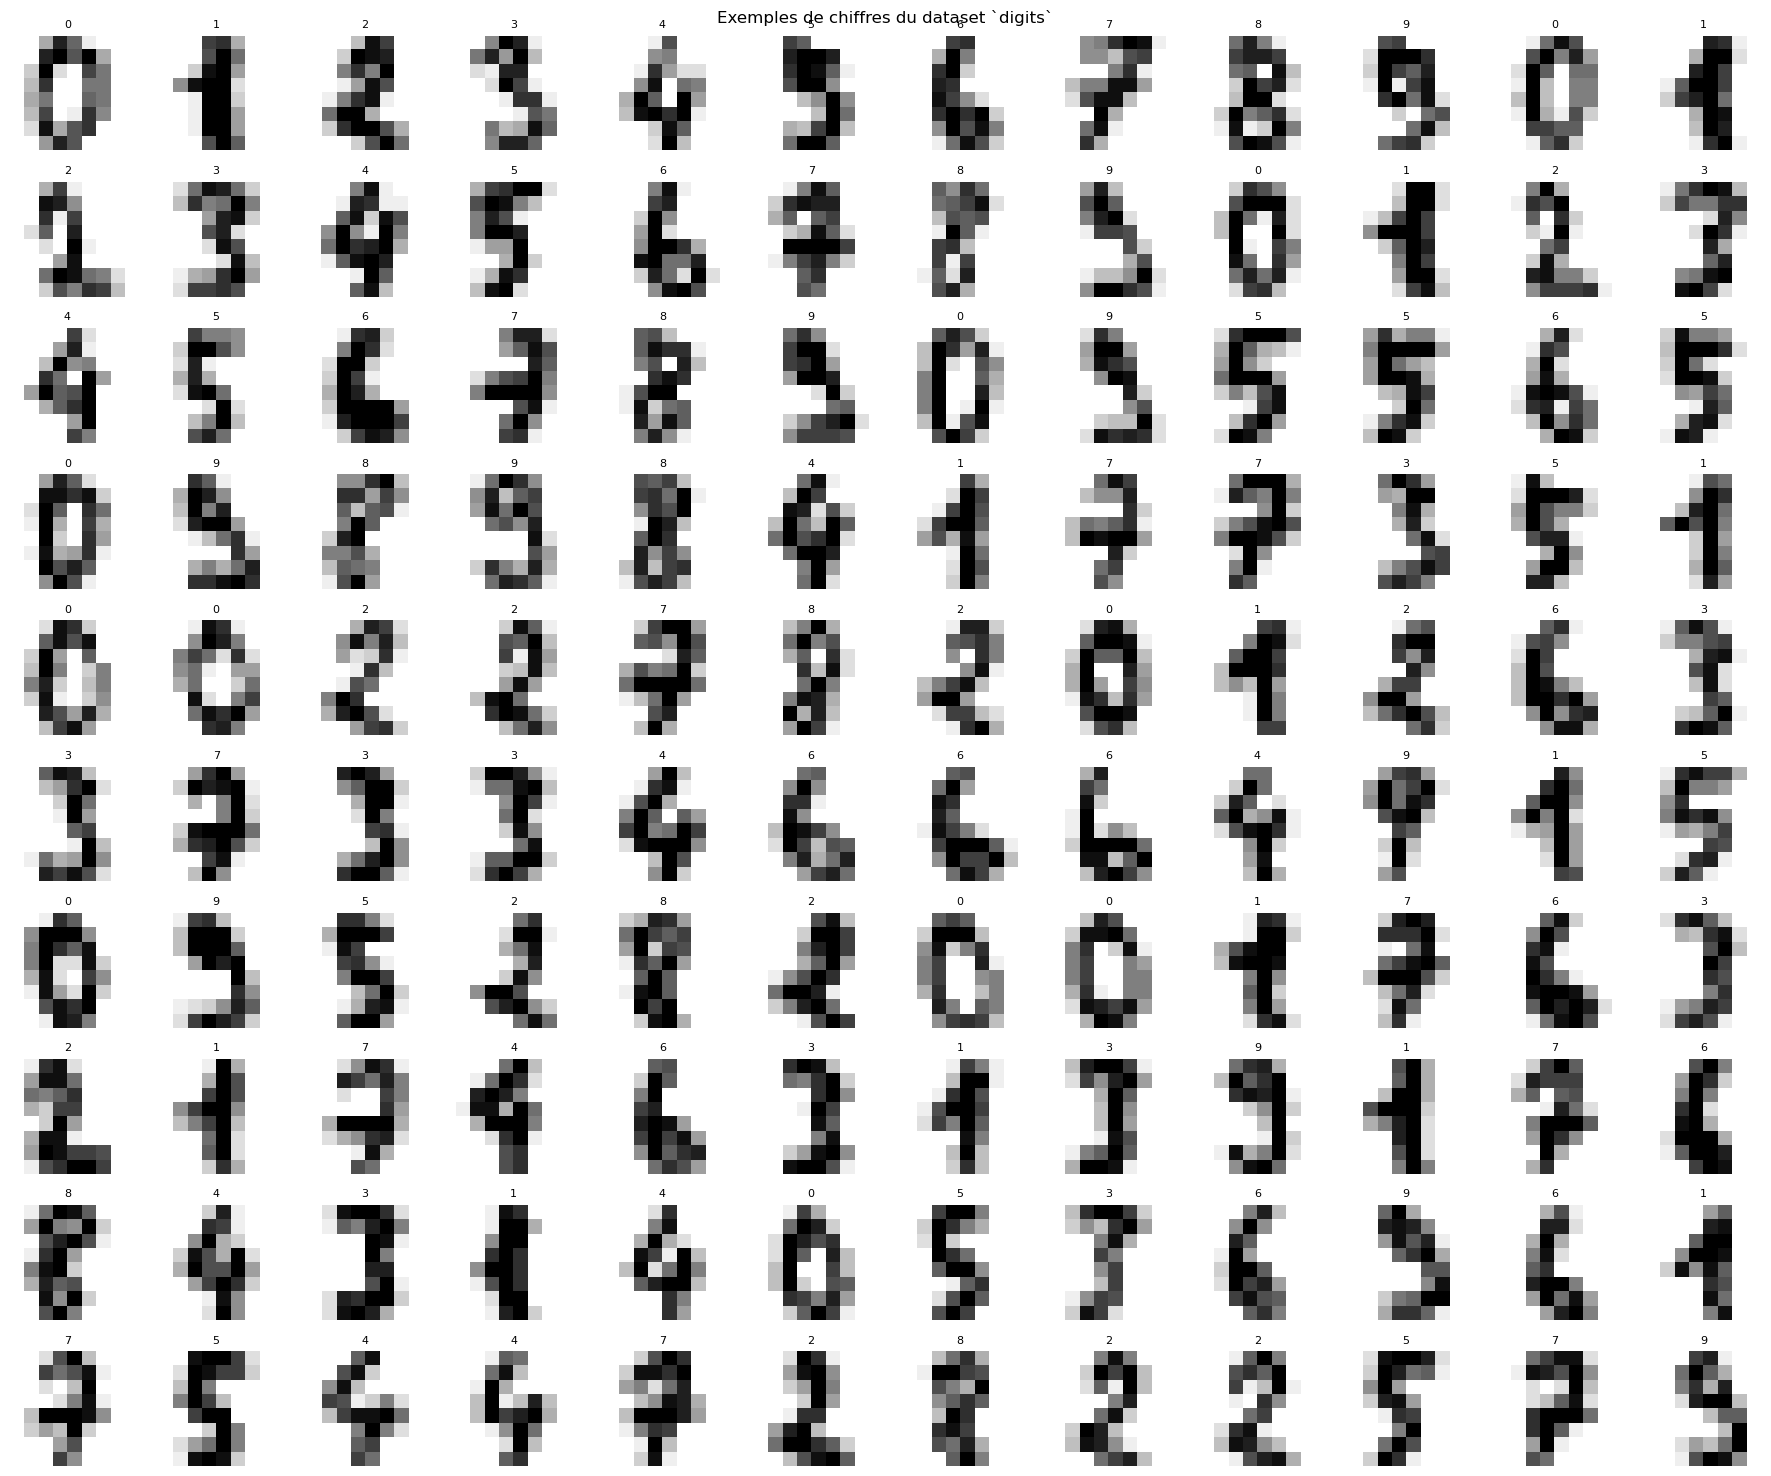

In [54]:
# X_digits contient les features (les images aplaties)
# y_digits contient les labels (les chiffres réels 0-9)
X_digits = digits.data
y_digits = digits.target

print(f"Forme des features (X_digits): {X_digits.shape}") # (1797 images, 64 features par image)
print(f"Forme des labels (y_digits): {y_digits.shape}")
print(f"Labels uniques (chiffres): {np.unique(y_digits)}")

# Visualisation de quelques chiffres du dataset
plt.figure(figsize=(18, 18))
for index, (image, label) in enumerate(zip(digits.images[:120], digits.target[:120])):
    plt.subplot(12, 12, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'{label}', fontsize=8)
plt.suptitle('Exemples de chiffres du dataset `digits`')
plt.tight_layout()
plt.show()

### 2.3 Entraînement du modèle K-NN et évaluation

Comme précédemment, nous allons diviser les données en ensembles d'entraînement et de test avant d'entraîner le classifieur K-NN.

Taille de X_digits_train: (1257, 64)
Taille de X_digits_test: (540, 64)

Score (Accuracy) K-NN sur l'ensemble d'entraînement: 0.9912
Score (Accuracy) K-NN sur l'ensemble de test: 0.9833

Matrice de confusion K-NN sur l'ensemble de test:
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  1  1  0]
 [ 0  0  0  0 53  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  0  0  0  0  1 49  0]
 [ 0  0  0  0  0  0  0  0  1 53]]

Rapport de classification K-NN sur l'ensemble de test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        55
           4       1.00      0.98      0.99        54
           5       1.00      0.98      0.99        

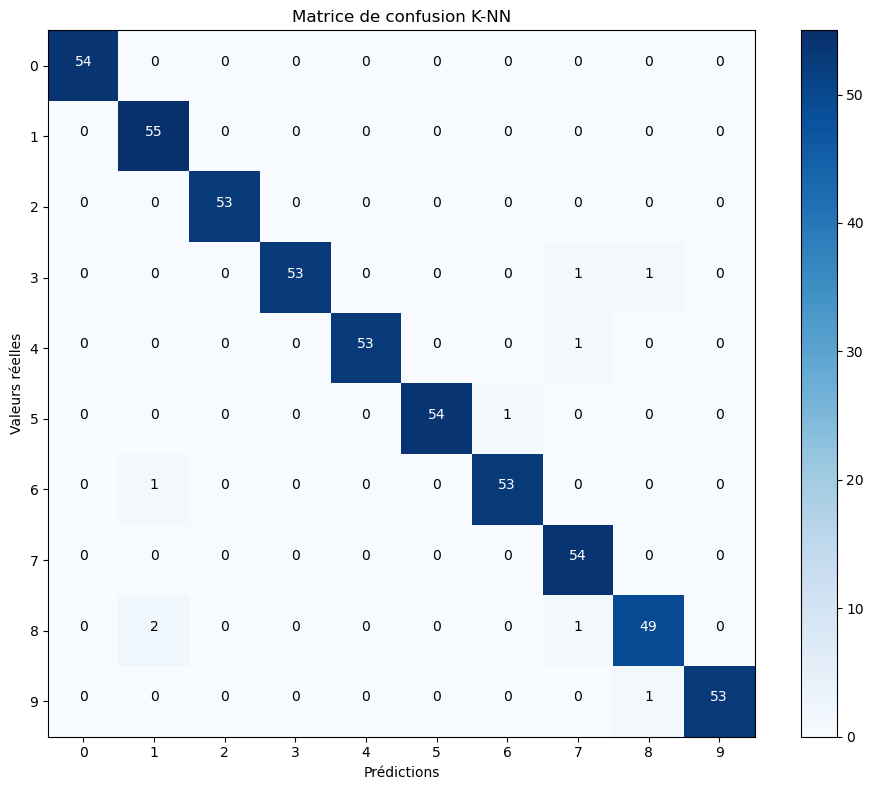

In [55]:
# Division des données 'digits'
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=random_state_seed, stratify=y_digits # stratify pour garder la proportion des classes
)

print(f"Taille de X_digits_train: {X_digits_train.shape}")
print(f"Taille de X_digits_test: {X_digits_test.shape}")

# Initialisation et entraînement du modèle KNeighborsClassifier
# n_neighbors: Nombre de voisins à considérer (valeur par défaut est 5)
model_knn = KNeighborsClassifier(n_neighbors=5) # On peut tester différentes valeurs de k
model_knn.fit(X_digits_train, y_digits_train)

# Évaluation du modèle K-NN sur l'ensemble d'entraînement
score_train_knn = model_knn.score(X_digits_train, y_digits_train)
print(f"\nScore (Accuracy) K-NN sur l'ensemble d'entraînement: {score_train_knn:.4f}")

# Évaluation du modèle K-NN sur l'ensemble de test
score_test_knn = model_knn.score(X_digits_test, y_digits_test)
print(f"Score (Accuracy) K-NN sur l'ensemble de test: {score_test_knn:.4f}")

# Prédictions sur l'ensemble de test pour des métriques plus détaillées
y_pred_knn = model_knn.predict(X_digits_test)
conf_matrix = confusion_matrix(y_digits_test, y_pred_knn)
print("\nMatrice de confusion K-NN sur l'ensemble de test:")
print(conf_matrix)
print("\nRapport de classification K-NN sur l'ensemble de test:")
print(classification_report(y_digits_test, y_pred_knn))

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Matrice de confusion K-NN')
plt.colorbar()

# Ajout des labels
tick_marks = np.arange(10)  # 10 classes (0-9)
plt.xticks(tick_marks, [str(i) for i in range(10)])
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')

# Ajout des valeurs dans les cellules
thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

### 2.4 Test du modèle sur une image spécifique

Nous allons tester le modèle sur la 100ème image du dataset original (qui est le chiffre 4) pour voir si la machine la reconnaît correctement.

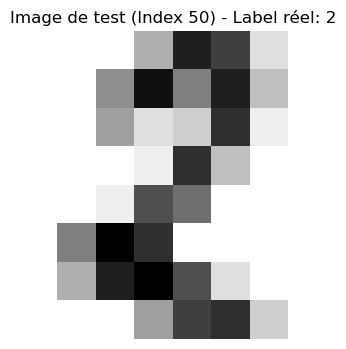


Image de test: Chiffre à l'index 50
Label réel: 2
Prédiction de la machine: 2
Résultat: La machine a correctement reconnu le chiffre !


In [56]:
image_index = 50
test_image = digits.images[image_index]
test_image_data = X_digits[image_index]
test_image_label = y_digits[image_index]

# Affichage de l'image de test
plt.figure(figsize=(4,4))
plt.imshow(test_image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Image de test (Index {image_index}) - Label réel: {test_image_label}")
plt.axis('off')
plt.show()

# Le modèle K-NN attend un ensemble d'échantillons (même pour un seul)
# Nous devons donc remodeler `test_image_data` pour qu'il ait la forme (1, 64)
test_image_reshaped = test_image_data.reshape(1, -1)

# Prédiction sur l'image de test
prediction = model_knn.predict(test_image_reshaped)
print(f"\nImage de test: Chiffre à l'index {image_index}")
print(f"Label réel: {test_image_label}")
print(f"Prédiction de la machine: {prediction[0]}")

if prediction[0] == test_image_label:
    print("Résultat: La machine a correctement reconnu le chiffre !")
else:
    print("Résultat: La machine n'a pas correctement reconnu le chiffre.")